Sakar, B. E., Isenkul, M. E., Sakar, C. O., Sertbas, A., Gurgen, F., Delil, S., Apaydin, H., & Kursun, O. (2013). Collection and analysis of a Parkinson speech dataset with multiple types of sound recordings. IEEE journal of biomedical and health informatics, 17(4), 828–834. https://doi.org/10.1109/JBHI.2013.2245674

In [ ]:
# %matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [91]:
# Load the Parkinson speech dataset
df = pd.read_csv('train_data.txt') # load data
# Rename columns in the dataframe
df.columns = ['subject id', 'jitter_local', 'jitter_local_absolute',
               'jitter_rap', 'jitter_ppq5', 'jitter_ddp', 'shimmer_local',
               'shimmer_local_db', 'shimmer_apq3', 'shimmer_apq5',
               'shimmer_apq11', 'shimmer_data', 'AC', 'NTH', 'HTN',
               'median_pitch', 'mean_pitch', 'standard_dev_pitch',
               'min_pitch', 'max_pitch', 'num_pulses', 'num_periods',
               'mean_period','standard_dev_period', 'frac_locally_unvoiced_frames',
               'num_voice_breaks','degree_of_voice_breaks', 'UPDRS', 'class'] # Assign column names to the data
# Drop unnecessary columns
df = df.drop(columns=['subject id', 'class']) # Remove columns named 'subject id' and 'class'

In [92]:
# Define a list of lists containing column names
gps = [
    ['jitter_local', 'jitter_local_absolute', 'jitter_rap', 'jitter_ppq5', 'jitter_ddp'],
    ['shimmer_local', 'shimmer_local_db', 'shimmer_apq3', 'shimmer_apq5', 'shimmer_apq11', 'shimmer_data'],
    ['median_pitch', 'mean_pitch', 'standard_dev_pitch', 'min_pitch', 'max_pitch'],
    ['AC', 'NTH', 'HTN'],
    ['num_pulses', 'num_periods', 'mean_period','standard_dev_period'],
    ['frac_locally_unvoiced_frames', 'num_voice_breaks','degree_of_voice_breaks'],
] # List containing lists that match dataframe column names
# Define UPDRS categories
UPDRS = '1', '5', '8', '11', '12', '16', '20', '23', '24', '26', '31', '32', '40', '46', '55'

In [93]:
# Split dataframe into features and target
X = df.iloc[:, :-1] # Select all columns except the last as X
y = df.iloc[:, -1] # Select the last column as y
# Standardize the features
X = StandardScaler().fit_transform(X) # Fit and transform in one step

In [94]:
# Define PCA function
def pca(X):
  scaler = StandardScaler() # Standardize data to zero mean and unit variance
  X_std = scaler.fit_transform(X)
  pca = PCA(n_components=X_std.shape[1])
  pca.fit(X_std)
  evs = pca.explained_variance_ratio_
  tot_ev = 0
  cnt = 0
  for i in evs:
    tot_ev += i
    cnt += 1
    if tot_ev >= 0.8:
      break
  ret = pca.transform(X_std)
  print(f"for {list(X.columns)}, keep {cnt} features to get an explained_variance_ratio of {tot_ev}")
  return ret[:,:cnt]

In [95]:
dfs_pca = []
for gp in gps:
  dfs_pca.append(pca(df[gp]).copy())

for ['jitter_local', 'jitter_local_absolute', 'jitter_rap', 'jitter_ppq5', 'jitter_ddp'], keep 1 features to get an explained_variance_ratio of 0.8898027996784916
for ['shimmer_local', 'shimmer_local_db', 'shimmer_apq3', 'shimmer_apq5', 'shimmer_apq11', 'shimmer_data'], keep 1 features to get an explained_variance_ratio of 0.8121322932673969
for ['median_pitch', 'mean_pitch', 'standard_dev_pitch', 'min_pitch', 'max_pitch'], keep 2 features to get an explained_variance_ratio of 0.9404758200268597
for ['AC', 'NTH', 'HTN'], keep 1 features to get an explained_variance_ratio of 0.9464691832031871
for ['num_pulses', 'num_periods', 'mean_period', 'standard_dev_period'], keep 3 features to get an explained_variance_ratio of 0.9998312651771136
for ['frac_locally_unvoiced_frames', 'num_voice_breaks', 'degree_of_voice_breaks'], keep 2 features to get an explained_variance_ratio of 0.9246679755940611


In [96]:
# Apply PCA to the data
df_pca = np.concatenate(dfs_pca, axis=1) 
print(df_pca.shape) # Using PCA to reduce to 10 features

(1039, 10)


In [97]:
# Oversample the dimensionality-reduced data
from imblearn.over_sampling import SMOTE

# Create SMOTE object
smote = SMOTE(random_state=42)
# Perform oversampling
X_, y_ = smote.fit_resample(df_pca, y)

In [98]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, random_state=47)

In [99]:
y_labels = list(df['UPDRS'].value_counts().index)
y_rates = [i/X.shape[0]*100 for i in list(df['UPDRS'].value_counts())]
print(y_rates)

[50.04812319538018, 7.507218479307026, 5.004812319538017, 5.004812319538017, 5.004812319538017, 4.908565928777671, 2.5024061597690084, 2.5024061597690084, 2.5024061597690084, 2.5024061597690084, 2.5024061597690084, 2.5024061597690084, 2.5024061597690084, 2.5024061597690084, 2.5024061597690084]


In [100]:
print(X.shape[0])
print(sum(list(df['UPDRS'].value_counts())))

1039
1039


In [101]:
# Repeat SMOTE and resampling for another dataset
from imblearn.over_sampling import SMOTE

# Create SMOTE object
smote = SMOTE(random_state=42)
# Perform oversampling
X, y = smote.fit_resample(X, y)

In [102]:
y_resample_rates = [i/X.shape[0]*100 for i in list(y.value_counts())]

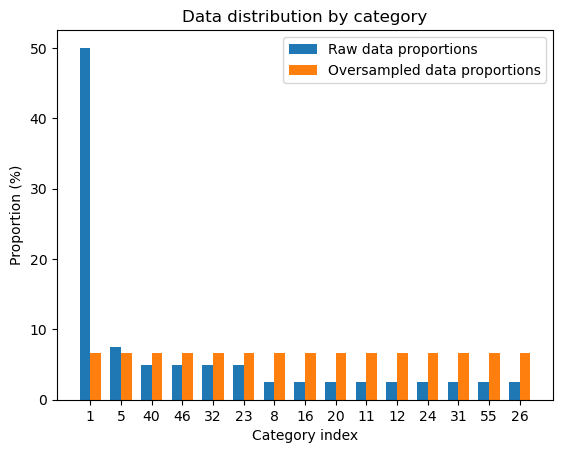

In [103]:
import numpy as np
import matplotlib.pyplot as plt

# Data Preparation
categories = y_labels          # Categories for the data
data1 = y_rates                # Proportions of each category in the raw data
data2 = y_resample_rates       # Proportions of each category in the oversampled data

# Setting the width of the bars in the bar chart
bar_width = 0.35

# Creating a range for horizontal adjustment of the bars' positions
x = np.arange(len(categories))

# Drawing the bar chart
plt.bar(x - bar_width/2, data1, width=bar_width, label='Raw data proportions')  # Bars for raw data
plt.bar(x + bar_width/2, data2, width=bar_width, label='Oversampled data proportions')  # Bars for oversampled data

# Adding a title and axis labels
plt.title("Data distribution by category")  # Chart title
plt.xlabel("Category index")                # X-axis label
plt.ylabel("Proportion (%)")                # Y-axis label

# Setting the labels for the x-axis ticks
plt.xticks(x, categories)  # Associate each bar with a category label

# Adding a legend to the chart
plt.legend()

# Displaying the chart
plt.show()


In [104]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, RocCurveDisplay
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.9323076923076923

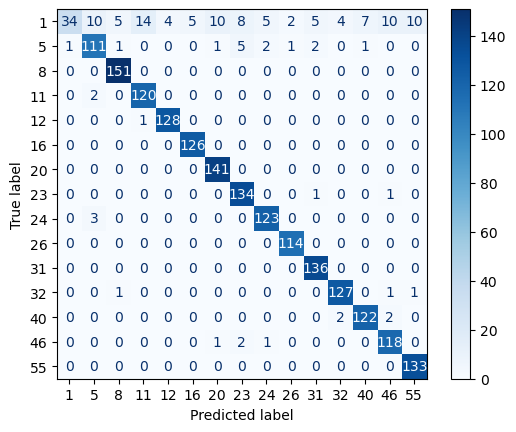

In [105]:
# print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues', display_labels=UPDRS);

In [106]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=47)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy_score(y_test, y_pred)

0.8784615384615385

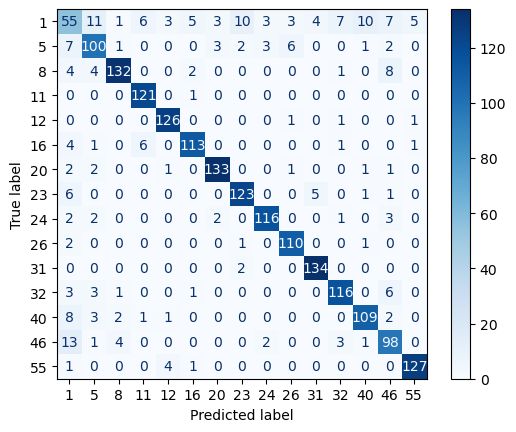

In [107]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap = 'Blues', display_labels=UPDRS);

In [108]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=47)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9528205128205128

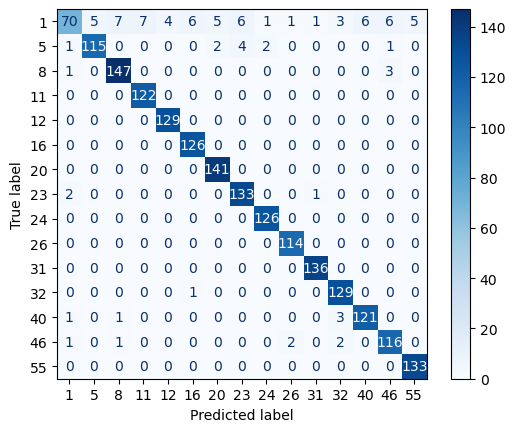

In [109]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues', display_labels = UPDRS);

In [110]:
rf.feature_importances_

array([0.02477882, 0.02514832, 0.02948777, 0.03001286, 0.02942752,
       0.02731088, 0.02236023, 0.03803856, 0.03316857, 0.03204148,
       0.03667305, 0.03275792, 0.03402778, 0.03941394, 0.1000699 ,
       0.06533045, 0.03528969, 0.06378971, 0.05629508, 0.02656662,
       0.03016899, 0.07377234, 0.03426641, 0.05035097, 0.01155247,
       0.01789966])

In [111]:
order = np.argsort(-rf.feature_importances_)

In [112]:
dfi = pd.DataFrame([tree.feature_importances_[order] for tree in rf.estimators_],
                   columns=df.columns[order])
dfi.head()

,median_pitch,mean_period,mean_pitch,min_pitch,max_pitch,frac_locally_unvoiced_frames,HTN,shimmer_apq3,shimmer_data,standard_dev_pitch,...,jitter_ppq5,jitter_rap,jitter_ddp,shimmer_local,num_pulses,jitter_local_absolute,jitter_local,shimmer_local_db,degree_of_voice_breaks,num_voice_breaks
0,0.088359,0.083962,0.048356,0.066921,0.066680,0.037673,0.040232,0.040467,0.041164,0.044789,...,0.032469,0.012704,0.048301,0.017279,0.033923,0.031671,0.041568,0.024341,0.021343,0.018758
1,0.031912,0.093758,0.088342,0.078245,0.064745,0.040383,0.026513,0.038477,0.036543,0.043117,...,0.036295,0.041565,0.014296,0.029110,0.027308,0.030735,0.019015,0.020151,0.037284,0.008635
2,0.058595,0.070863,0.129719,0.029135,0.046347,0.062821,0.027331,0.038173,0.049133,0.025883,...,0.034245,0.036491,0.029355,0.033144,0.034262,0.016964,0.018902,0.014886,0.018510,0.009315
3,0.095758,0.046161,0.087779,0.061650,0.036818,0.048488,0.044499,0.062810,0.035449,0.043145,...,0.015441,0.032693,0.023985,0.043536,0.026919,0.036058,0.036371,0.016619,0.014905,0.017536
4,0.126688,0.074625,0.070775,0.031340,0.096778,0.064993,0.043105,0.041450,0.024991,0.022915,...,0.031585,0.021995,0.019315,0.023780,0.038066,0.026781,0.034765,0.024280,0.014687,0.009398


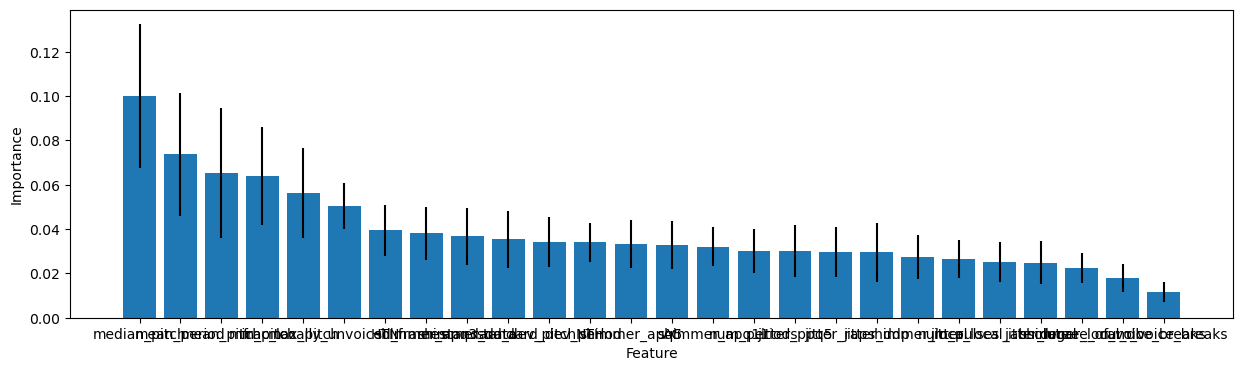

In [113]:
plt.figure(figsize=(15, 4))
xpos = range(dfi.shape[1])
plt.bar(xpos, dfi.mean(), yerr=dfi.std())
plt.xticks(xpos, dfi.columns)
plt.ylabel('Importance')
plt.xlabel('Feature');

In [114]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
linear = svm.SVC(kernel='linear',decision_function_shape ='ovo')
linear.fit(X_train, y_train)
linear_pred = linear.predict(X_test)
accuracy_score(y_test, linear_pred)

0.8676923076923077

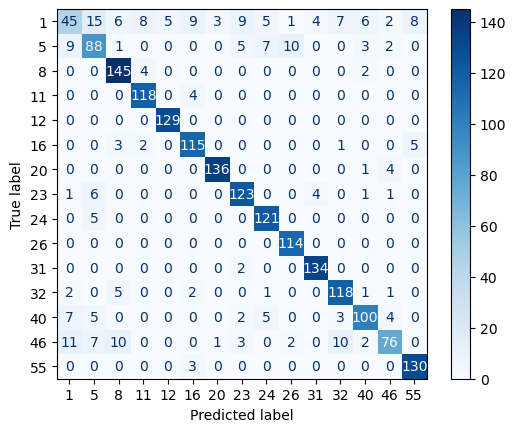

In [115]:
ConfusionMatrixDisplay.from_predictions(y_test, linear_pred, cmap = 'Blues', display_labels=UPDRS);

In [116]:
rbf = svm.SVC(kernel='rbf', decision_function_shape ='ovo').fit(X_train, y_train)
rbf_pred = rbf.predict(X_test)
accuracy_score(y_test, rbf_pred)

0.9174358974358975

In [117]:
sig = svm.SVC(kernel='sigmoid', decision_function_shape ='ovo').fit(X_train, y_train)
sig_pred = sig.predict(X_test)
accuracy_score(y_test, sig_pred)

0.25333333333333335

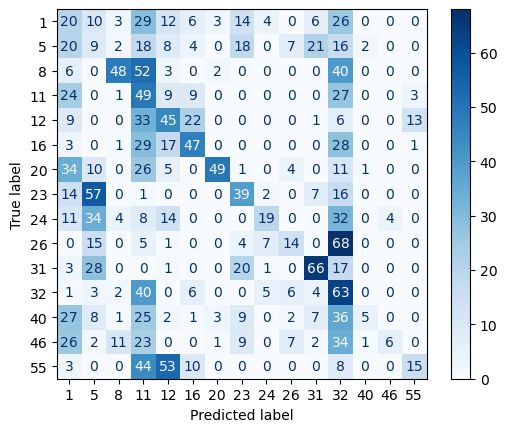

In [118]:
ConfusionMatrixDisplay.from_predictions(y_test, sig_pred, cmap = 'Blues', display_labels=UPDRS);

In [119]:
models = [knn, dt, rf, linear, rbf, sig]
names = ['K-Nearest Neighbors', 'Decision Tree', 'Random Forest', 'SVM (Linear)', 'SVM (RBF)', 'SVM (Sigmoid)']
scores = [accuracy_score(y_test, x.predict(X_test)) for x in models]
scores

[0.9323076923076923,
 0.8784615384615385,
 0.9528205128205128,
 0.8676923076923077,
 0.9174358974358975,
 0.25333333333333335]

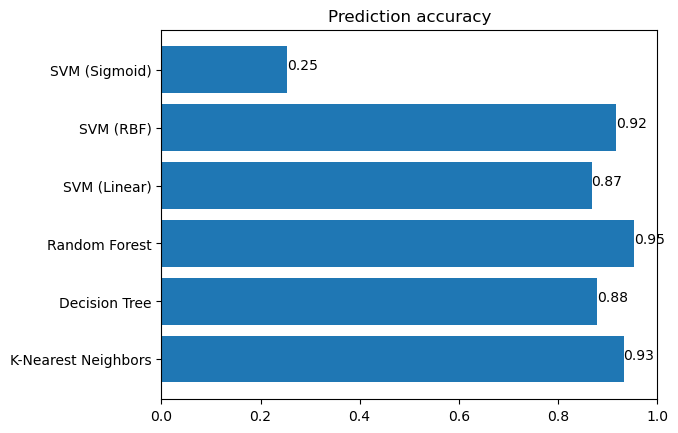

In [120]:
plt.barh(range(6), [accuracy_score(y_test, x.predict(X_test)) for x in models])
accuracies = [accuracy_score(y_test, x.predict(X_test)) for x in models]
for index, value in enumerate(accuracies):
    plt.text(value, index, f'{value:.2f}')
plt.xticks()
plt.yticks(range(6), names)
plt.title('Prediction accuracy');

In [121]:
# Analyze data after dimensionality reduction using PCA
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.model_selection import train_test_split
knn = KNeighborsClassifier()
knn.fit(X_train_, y_train_)
y_pred = knn.predict(X_test_)
accuracy_score(y_test_, y_pred)

0.9225641025641026

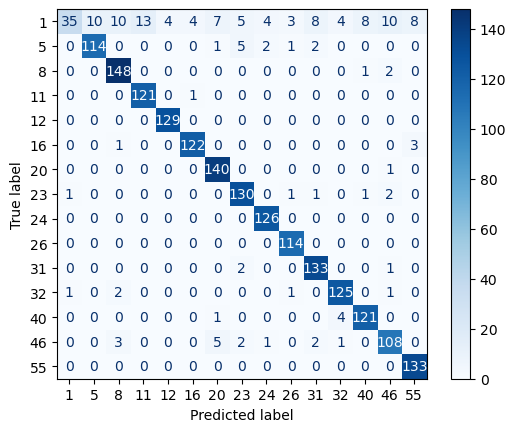

In [122]:
ConfusionMatrixDisplay.from_predictions(y_test_, y_pred, cmap = 'Blues', display_labels=UPDRS);

In [123]:
# DTC
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=47)
dt.fit(X_train_, y_train_)
y_pred = dt.predict(X_test_)
accuracy_score(y_test_, y_pred)

0.8753846153846154

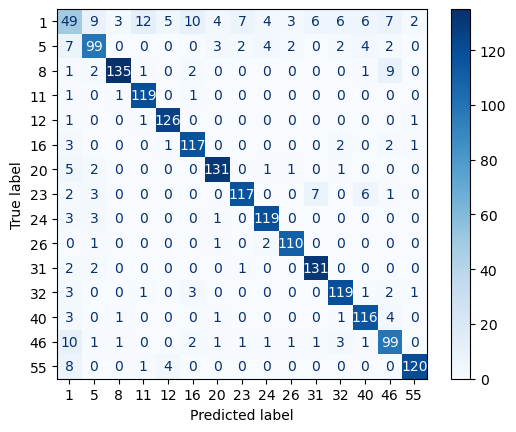

In [124]:
ConfusionMatrixDisplay.from_predictions(y_test_, y_pred, cmap = 'Blues', display_labels=UPDRS);

In [125]:
# RFC
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=47)
rf.fit(X_train_, y_train_)
y_pred = rf.predict(X_test_)
accuracy_score(y_test_, y_pred)

0.9451282051282052

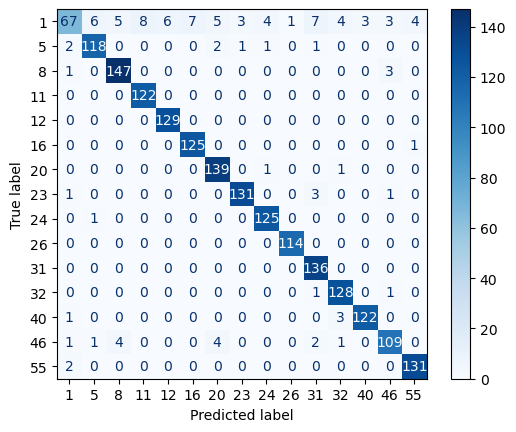

In [126]:
ConfusionMatrixDisplay.from_predictions(y_test_, y_pred, cmap = 'Blues', display_labels=UPDRS);

In [127]:
# SVC(Linear)
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
linear = svm.SVC(kernel='linear',decision_function_shape ='ovo')
linear.fit(X_train_, y_train_)
linear_pred = linear.predict(X_test_)
accuracy_score(y_test_, linear_pred)

0.6979487179487179

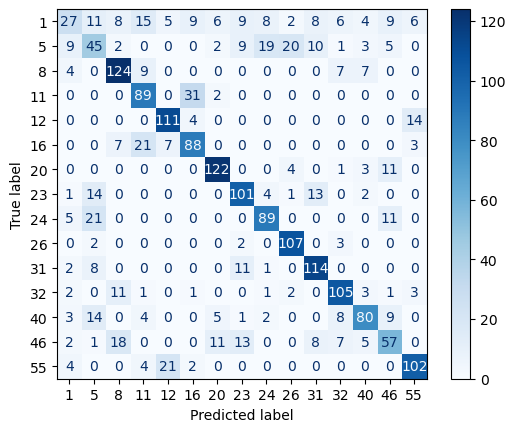

In [128]:
ConfusionMatrixDisplay.from_predictions(y_test_, linear_pred, cmap = 'Blues', display_labels=UPDRS);

In [129]:
# SVC(RBF)
rbf = svm.SVC(kernel='rbf', decision_function_shape ='ovo').fit(X_train_, y_train_)
rbf_pred = rbf.predict(X_test_)
accuracy_score(y_test_, rbf_pred)

0.8558974358974359

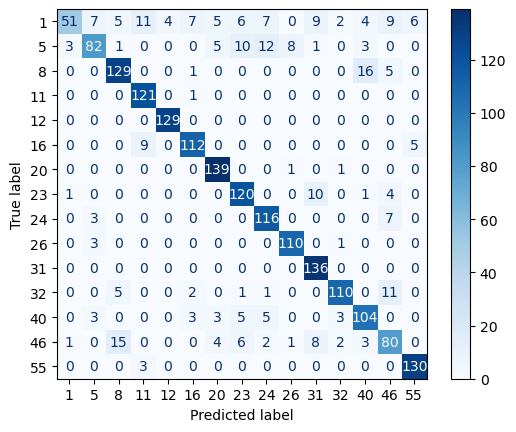

In [130]:
ConfusionMatrixDisplay.from_predictions(y_test_, rbf_pred, cmap = 'Blues', display_labels=UPDRS);

In [131]:
sig = svm.SVC(kernel='sigmoid', decision_function_shape ='ovo').fit(X_train_, y_train_)
sig_pred = sig.predict(X_test_)
accuracy_score(y_test_, sig_pred)

0.2

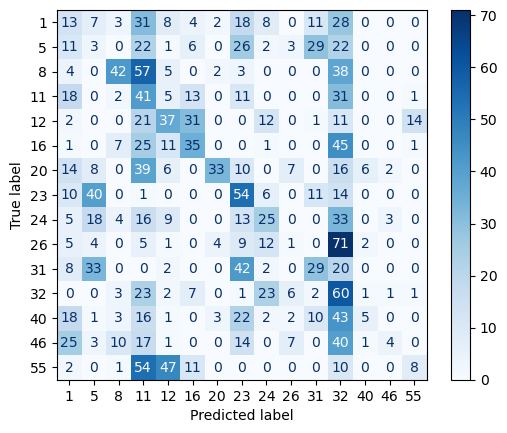

In [132]:
ConfusionMatrixDisplay.from_predictions(y_test_, sig_pred, cmap = 'Blues', display_labels=UPDRS);

In [133]:
models = [knn, dt, rf, linear, rbf, sig]
names = ['K-Nearest Neighbors', 'Decision Tree', 'Random Forest', 'SVM (Linear)', 'SVM (RBF)', 'SVM (Sigmoid)']
scores_ = [accuracy_score(y_test_, x.predict(X_test_)) for x in models]
scores_

[0.9225641025641026,
 0.8753846153846154,
 0.9451282051282052,
 0.6979487179487179,
 0.8558974358974359,
 0.2]

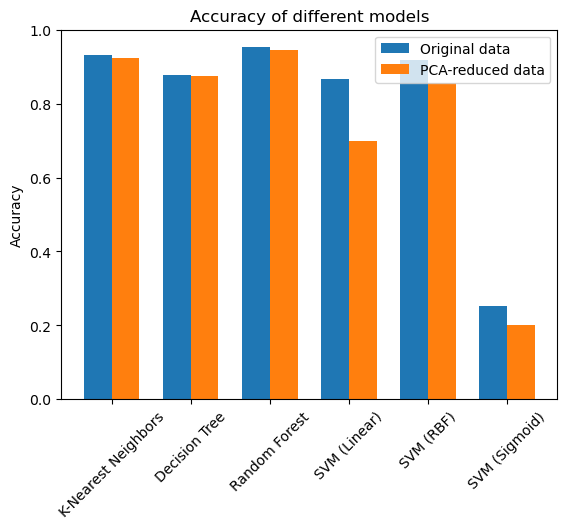

In [134]:
import numpy as np
import matplotlib.pyplot as plt

# Data preparation
categories = names          # Model names
data1 = scores              # Accuracy scores for original data
data2 = scores_             # Accuracy scores for PCA-reduced data

# Setting the width of the bars in the bar chart
bar_width = 0.35

# Creating a range for horizontal adjustment of the bars' positions
x = np.arange(len(categories))

# Drawing the bar chart
plt.bar(x - bar_width/2, data1, width=bar_width, label='Original data')  # Bars for original data
plt.bar(x + bar_width/2, data2, width=bar_width, label='PCA-reduced data')  # Bars for PCA-reduced data

# Adding a title and axis labels
plt.title("Accuracy of different models")  # Chart title
# plt.xlabel("Model name")                # X-axis label (commented out)
plt.ylabel("Accuracy")                    # Y-axis label

# Setting the labels for the x-axis ticks
plt.xticks(x, categories)  # Associate each bar with a model name
plt.xticks(rotation=45)    # Rotate x-axis labels for better readability

# Adding a legend to the chart
plt.legend()

# Displaying the chart
plt.show()